In [1]:
# audio classification using machine learning 
# Source Krish Naik Youtube Channel

In [2]:
# EDA - exploratory data analysis
import pandas as pd

In [3]:
!pip install librosa

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 809D-E080

 Directory of C:\Users\palle\OneDrive\Documents\ML_PROJECTS

08-09-2024  00:01    <DIR>          .
07-09-2024  10:19    <DIR>          ..
30-08-2024  14:01             3,301 .gitignore
30-08-2024  17:42    <DIR>          .ipynb_checkpoints
07-09-2024  22:54            65,312 4918-3-0-0.wav
30-08-2024  17:55           705,644 6988-5-0-2.wav
08-09-2024  00:01         1,320,354 Audio_Classification.ipynb
02-09-2024  18:30                63 DATASET_LINK.txt
31-08-2024  22:49               249 README.md
02-09-2024  18:07    <DIR>          saved_models
07-09-2024  23:37    <DIR>          UrbanSound8K
30-08-2024  18:58           494,104 UrbanSound8K.csv
               7 File(s)      2,589,027 bytes
               5 Dir(s)  312,511,574,016 bytes free


In [6]:
filename = '6988-5-0-2.wav'

In [7]:
import IPython.display as ipd
import librosa
import librosa.display

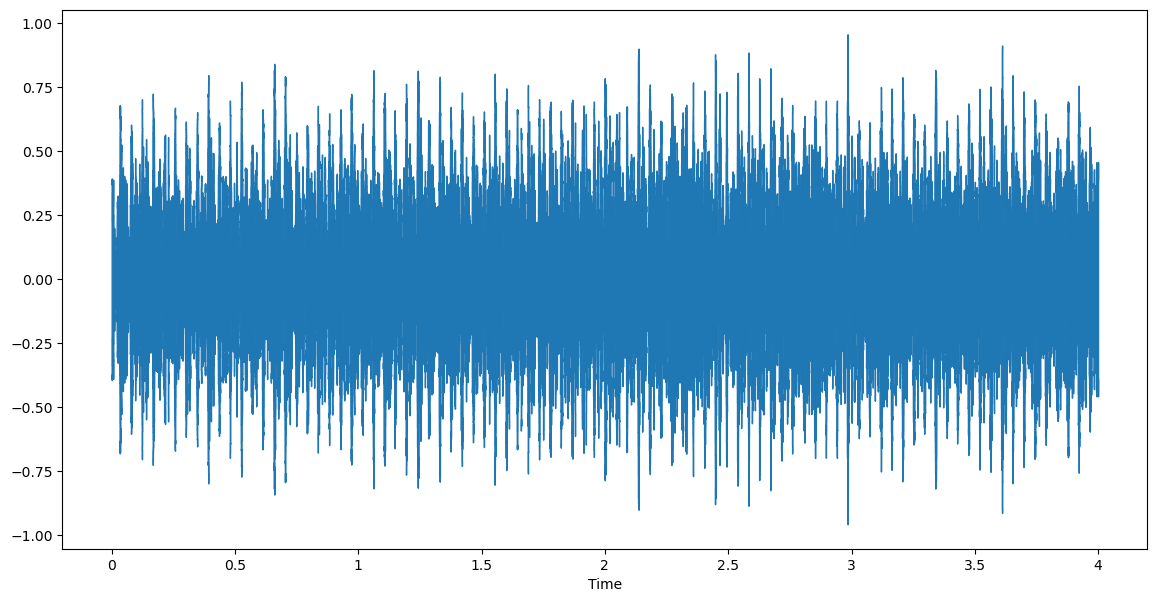

In [8]:
plt.figure(figsize = (14,7))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate) # in old version (display.waveplot) and new version display.waveshow
ipd.Audio(filename)

# sample rate is the number of samples per second that are taken of a waveform to create a discete digital signal.

In [9]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [10]:
wave_sample_rate

44100

In [11]:
wave_audio # wave signal values and the values are not normalized

array([[10489,  9151],
       [ 9553,  9744],
       [ 8660, 10220],
       ...,
       [11117, 17460],
       [10920, 17062],
       [10583, 16556]], dtype=int16)

In [12]:
data # siganl  values with normalization 

array([0.22105733, 0.31147373, 0.26495025, ..., 0.4503034 , 0.42876196,
       0.4496042 ], dtype=float32)

In [13]:
metadata = pd.read_csv('UrbanSound8K.csv')
metadata.head() # you can see file location and also you can see present in which folder

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
# To check whether the dataset is balanced or imbalanced
metadata['class'].value_counts() # proper dataset , not imbalanced

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [15]:
# Data PreProcessing 

In [16]:
import librosa 
audio_file_path = '6988-5-0-2.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)
# librosa make sure that sample rate is in range of 21KHZ and audio data in the range of 1 to -1(it will normalize the data)

In [17]:
print(librosa_audio_data) # it will try to convert into mono audio (1D dimension) , in stereo audio there will be two Dimension or more

[0.22105733 0.31147373 0.26495025 ... 0.4503034  0.42876196 0.4496042 ]


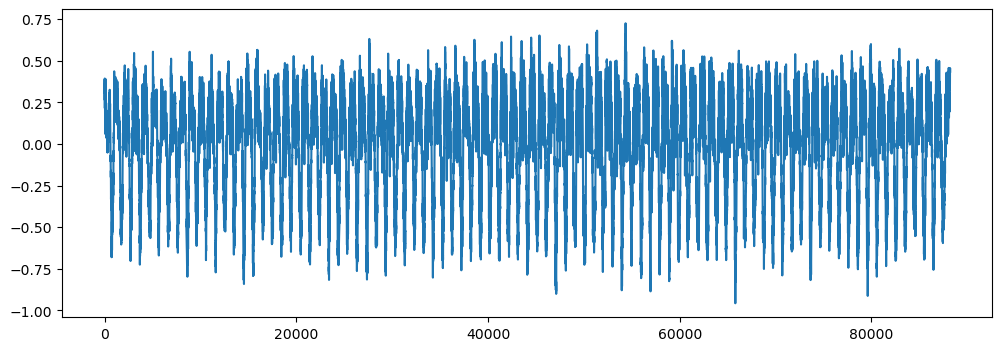

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,4))
plt.plot(librosa_audio_data)

In [19]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

# if we use scipy , instead of changing the audio to Mono, it keeps the audio in it's original form either it is stereo or mono or anything else

In [20]:
wave_audio # see now we got 2D means it is stereo but librosa converted it into mono.

array([[10489,  9151],
       [ 9553,  9744],
       [ 8660, 10220],
       ...,
       [11117, 17460],
       [10920, 17062],
       [10583, 16556]], dtype=int16)

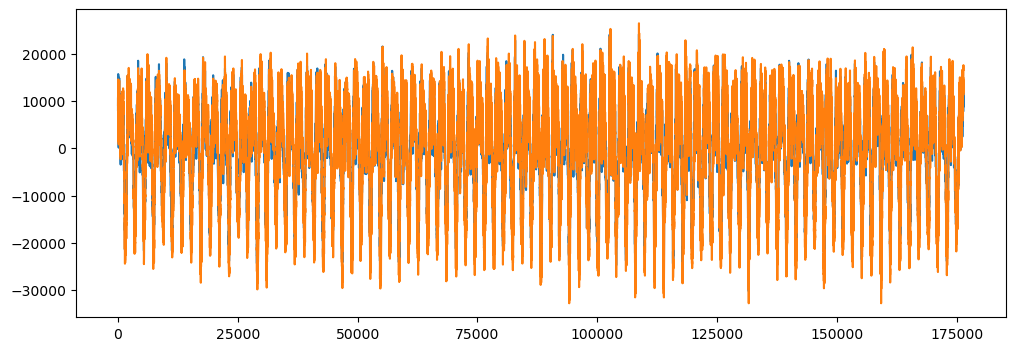

In [21]:
plt.figure(figsize = (12,4))
plt.plot(wave_audio) # there are two channels data is getting plotted 
plt.show()

In [22]:
# we will take these signals and try to create independent features 

### Extract Features

Here we will be using Mel - Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyze both the frequency and time characteristics of the sound. These audio representations will show us to identify features for classification

If you want understand MFCC more deeply you can follow this link 
https://www.youtube.com/watch?v=4_SH2nfbQZ8


i will give you a simple explanation what MFCC does it will try to convert the audio into some kind of features based on frequency and time characteristics.|

In [23]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr = librosa_sample_rate,n_mfcc = 40)
mfccs.shape # the all audio signal converted into (40, 173)

(40, 173)

In [24]:
mfccs # for only one file

array([[-1.22906883e+02, -1.23734085e+02, -1.22381927e+02, ...,
        -1.11095215e+02, -1.01832664e+02, -8.14414215e+01],
       [ 1.25124786e+02,  1.40966064e+02,  1.48583862e+02, ...,
         1.68579376e+02,  1.45028687e+02,  1.21862885e+02],
       [-1.48540745e+01, -2.71234093e+01, -3.62249222e+01, ...,
        -3.64198990e+01, -2.22964745e+01, -2.85062504e+00],
       ...,
       [ 4.95576286e+00,  7.52594948e+00,  6.70003176e+00, ...,
         1.79092836e+00,  2.90842533e+00,  2.79876828e+00],
       [ 3.84046483e+00,  4.03901005e+00,  5.14087343e+00, ...,
         7.73885846e-02, -6.34973347e-01,  1.21690512e+00],
       [ 6.68846893e+00,  3.62380576e+00,  6.81478691e+00, ...,
        -1.38812435e+00,  2.18824053e+00,  3.01466846e+00]], dtype=float32)

In [25]:
import pandas as pd
import os
import librosa

audio_dataset_path = 'UrbanSound8K/audio'
metadata = pd.read_csv('UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [26]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr = sample_rate,n_mfcc = 40 )
    mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

    return mfccs_scaled_features
    

in the above cell i have written res_type = 'kaiser_fast' , it is used for faster method, there are some other parameters also like kaiser_best for high quality mode and someother which can you can see the documentation 

In [27]:
import librosa
print(librosa.__version__)
import os
!pip install resampy
import numpy as np
from tqdm import tqdm # to see the progress
!pip install --upgrade librosa


0.10.2.post1


In [28]:
import resampy
extracted_features = []
for index_num,row in tqdm(metadata.iterrows()): # iterrows helps us to iter through all the rows
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["fold"])+'/',str(row['slice_file_name'])) # slice_file_name , it will pick up the file name and extract the data from it
    final_class_labels = row['class']
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels]) # later on we will convert this into a dataframe

3555it [03:11, 18.49it/s]C:\Users\palle\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [07:18, 25.32it/s]C:\Users\palle\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8327it [07:18, 28.66it/s]C:\Users\palle\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [07:38, 19.06it/s]


In [29]:
extracted_features_df = pd.DataFrame(extracted_features, columns = ['feature', 'class'])
extracted_features_df.head()
# converted them into a dataframe


,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [30]:
# we will split the dataset into independent and dependent features
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [31]:
X.shape
print(y)

['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


In [32]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6985, 40)
(1747, 40)
(6985, 10)
(1747, 10)


In [35]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Model Creation

In [36]:

import tensorflow as tf
print(tf.__version__)

2.17.0


In [37]:
from tensorflow.keras.models import Sequential # Sequential allows us to build a model by stacking layers sequentially.
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

Dense Layer is the most common type of layer in neural networks especially in fully connected networks, it's used when every neuron in a layer needs to be connected to every neuron in the next layer
. The Dense Layer Peforms matrix multiplication with weights and adds a bias to produce an Output, it also applies activation function


Dropout layer is used to prevent overfittin in neural networks. it's applied during training to randomly drop a certain percentage of neurons, forcing the network to learn more features and it randomly sets a fraction of the inputs units to 0 at each update during training time

Adam Optimizer that adapts learning rates based on first and second moments of gradients

In [38]:
# No of Classes
num_labels = y.shape[1]

In [39]:
model = Sequential()

# First Layer
model.add(Dense(100, input_shape=(40,)))  # 100 Neurons with 40 features
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Third Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))


C:\Users\palle\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'],optimizer = 'adam')

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', verbose = 1, save_best_only = True)
start = datetime.now()

model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs,validation_data = (X_test, y_test), callbacks= checkpointer)

duration = datetime.now() - start
print("Training Time :", duration)

Epoch 1/100
196/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6648 - loss: 0.9871
Epoch 1: val_loss improved from inf to 0.69143, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6653 - loss: 0.9857 - val_accuracy: 0.7808 - val_loss: 0.6914
Epoch 2/100
212/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6645 - loss: 0.9843
Epoch 2: val_loss did not improve from 0.69143
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6650 - loss: 0.9838 - val_accuracy: 0.7796 - val_loss: 0.7162
Epoch 3/100
192/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6764 - loss: 0.9558
Epoch 3: val_loss did not improve from 0.69143
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.9575 - val_accuracy: 0.7790 - val_loss: 0.7208
Epoch 4/100
195/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6662 - loss: 0.9763
Epoch 4: val_loss did not improve from 0.69143
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6

In [47]:
test_accuracy = model.evaluate(X_test,y_test, verbose = 0)
print(test_accuracy)

[0.6295297145843506, 0.7973669171333313]


In [48]:
filename = '6988-5-0-2.wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)

predictions = model.predict(prediction_feature)
predicted_class = np.argmax(predictions, axis = 1)


print(f"Predicted class: {predicted_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted class: 1


In [49]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
metadata['class'] = labelencoder.fit_transform(metadata['class'])
metadata.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,3
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,2
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,2
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,2
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,2


### Testing some Test Audio 

# Steps
#     . preprocess the new audio data
#     . Predict the classes
#     . Invere transform your Predictied Label


In [54]:
import librosa
import numpy as np
filename = "4918-3-0-0.wav" # you can take another file and try to predicit it
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities, axis=1)
prediction_class = labelencoder.inverse_transform(predicted_label)

# Print the predicted class
print(prediction_class)
print(predicted_probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
['dog_bark']
[[2.2344018e-04 1.1351102e-03 7.6401807e-02 7.2752756e-01 1.9493282e-02
  2.7273204e-03 1.1193071e-01 6.6686903e-07 2.5345847e-02 3.5214249e-02]]


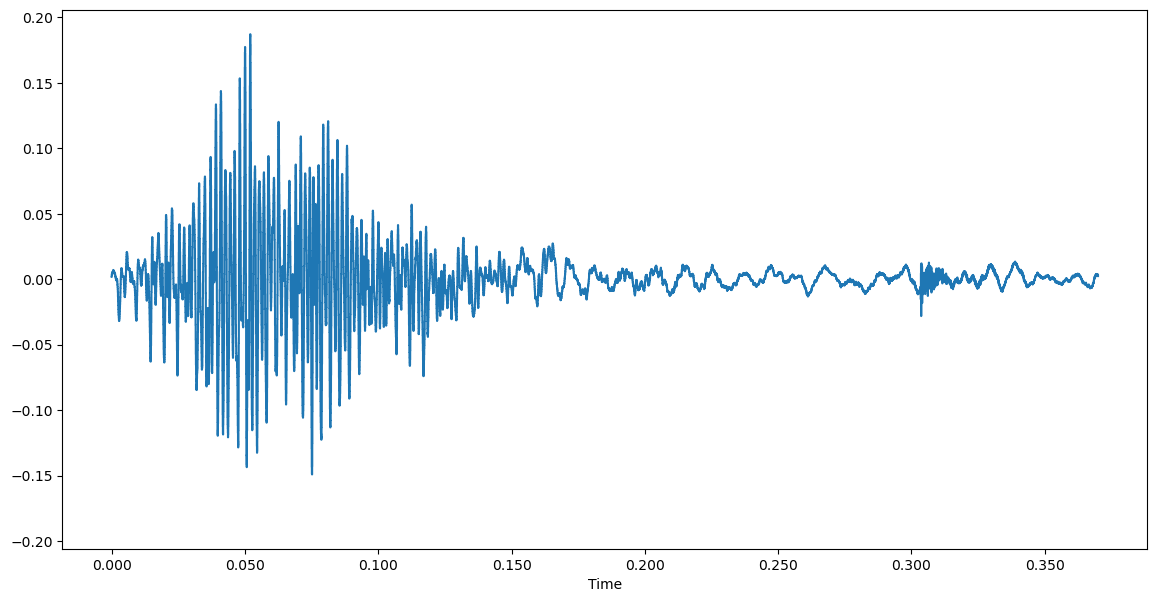

In [55]:
plt.figure(figsize = (14,7))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate) # in old version (display.waveplot) and new version display.waveshow
ipd.Audio(filename)